<div style="text-align: center;">
    <h1>Escuela Politécnica Nacional</h1>
    <h2>Recuperación de Información</h2>
</div>

**Nombre:** David Calahorrano  
**Fecha:** 17 diciembre de 2024  
**Docente:** Ing. Iván Carrera

In [1]:
import pandas as pd
import kagglehub
from sklearn.feature_extraction.text import CountVectorizer
import numpy as np
from nltk.corpus import stopwords
import nltk

c:\Users\USER\AppData\Local\Programs\Python\Python312\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


## 1. Definir el corpus

In [2]:
import pandas as pd
import kagglehub

# Descargar el dataset desde Kaggle
path = kagglehub.dataset_download("vishakhdapat/imdb-movie-reviews")

# Cargar el archivo CSV
df = pd.read_csv(f"{path}/IMDB Dataset.csv")

# Verificar las columnas disponibles en el DataFrame
print("Columnas del DataFrame:", df.columns)

# Extraer las primeras 20 reseñas de la columna correcta
if 'review' in df.columns:
    corpus = df['review'].head(20).tolist()
    print("Primeras 20 reseñas:")
    print(corpus)
else:
    print("La columna 'review' no está presente en el archivo.")

Columnas del DataFrame: Index(['review', 'sentiment'], dtype='object')
Primeras 20 reseñas:
["One of the other reviewers has mentioned that after watching just 1 Oz episode you'll be hooked. They are right, as this is exactly what happened with me.<br /><br />The first thing that struck me about Oz was its brutality and unflinching scenes of violence, which set in right from the word GO. Trust me, this is not a show for the faint hearted or timid. This show pulls no punches with regards to drugs, sex or violence. Its is hardcore, in the classic use of the word.<br /><br />It is called OZ as that is the nickname given to the Oswald Maximum Security State Penitentary. It focuses mainly on Emerald City, an experimental section of the prison where all the cells have glass fronts and face inwards, so privacy is not high on the agenda. Em City is home to many..Aryans, Muslims, gangstas, Latinos, Christians, Italians, Irish and more....so scuffles, death stares, dodgy dealings and shady agree

In [3]:
# Mostrar las primeras 20 reseñas en formato vertical
if 'review' in df.columns:
    corpus = df['review'].head(20).tolist()
    print("Primeras 20 reseñas en formato vertical:\n")
    for i, review in enumerate(corpus, start=1):
        print(f"Reseña {i}:\n{review}\n{'-'*80}")
else:
    print("La columna 'review' no está presente en el archivo.")

Primeras 20 reseñas en formato vertical:

Reseña 1:
One of the other reviewers has mentioned that after watching just 1 Oz episode you'll be hooked. They are right, as this is exactly what happened with me.<br /><br />The first thing that struck me about Oz was its brutality and unflinching scenes of violence, which set in right from the word GO. Trust me, this is not a show for the faint hearted or timid. This show pulls no punches with regards to drugs, sex or violence. Its is hardcore, in the classic use of the word.<br /><br />It is called OZ as that is the nickname given to the Oswald Maximum Security State Penitentary. It focuses mainly on Emerald City, an experimental section of the prison where all the cells have glass fronts and face inwards, so privacy is not high on the agenda. Em City is home to many..Aryans, Muslims, gangstas, Latinos, Christians, Italians, Irish and more....so scuffles, death stares, dodgy dealings and shady agreements are never far away.<br /><br />I wou

## 2. Generar la matriz Término-Documento

In [4]:
nltk.download('stopwords')
stop_words = stopwords.words('spanish')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\USER/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [5]:
vectorizer = CountVectorizer(stop_words=stop_words)
X = vectorizer.fit_transform(corpus).toarray()
X = X / np.linalg.norm(X, axis=1, keepdims=True)  # Normalización fila por fila
vocab = vectorizer.get_feature_names_out()

# Mostrar la matriz Término-Documento
print("Vocabulario:")
print(vocab)
print("\nMatriz Término-Documento (X):")
print(X)

Vocabulario:
['10' '12' '15' ... 'young' 'your' 'zombie']

Matriz Término-Documento (X):
[[0.         0.         0.         ... 0.         0.0316386  0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.05391639 0.         0.        ]
 ...
 [0.03155972 0.         0.         ... 0.         0.03155972 0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]]


### 2.1. Calcular las dimensiones de X

In [6]:
N, d_model = X.shape  # Número de documentos y tamaño del vocabulario
num_heads = 7  # Dividir en 3 cabezas
d_k = d_model // num_heads  # Dimensión por cabeza (para simplificar)
d_k

161

## 3. Crear las matrices entrenables (W_Q, W_K, W_V)

In [7]:
np.random.seed(42)  # Para reproducibilidad
W_Q = np.random.rand(d_model, d_k)
W_K = np.random.rand(d_model, d_k)
W_V = np.random.rand(d_model, d_k)
W_Q

array([[0.37454012, 0.95071431, 0.73199394, ..., 0.23763754, 0.72821635,
        0.36778313],
       [0.63230583, 0.63352971, 0.53577468, ..., 0.2502429 , 0.54922666,
        0.71459592],
       [0.66019738, 0.2799339 , 0.95486528, ..., 0.62939864, 0.69574869,
        0.45454106],
       ...,
       [0.25369344, 0.80850207, 0.99936416, ..., 0.97506113, 0.78706403,
        0.14512687],
       [0.358079  , 0.89864633, 0.5971351 , ..., 0.06361746, 0.88968332,
        0.21022692],
       [0.78606446, 0.05898397, 0.68113853, ..., 0.77127367, 0.52412462,
        0.23438427]])

## 4. Calcular Q, K y V

In [8]:
Q = np.dot(X, W_Q)
K = np.dot(X, W_K)
V = np.dot(X, W_V)
Q

array([[4.47679875, 5.16890994, 4.80526126, ..., 5.01107582, 4.99238451,
        4.85396329],
       [3.03122501, 3.70900232, 3.4295416 , ..., 3.34659689, 3.56746839,
        3.45132017],
       [3.76760832, 4.60585487, 4.61515121, ..., 4.64643077, 4.60070812,
        4.27575489],
       ...,
       [3.28444008, 3.74052467, 3.39705113, ..., 3.59298069, 3.37330856,
        3.47265935],
       [3.36213579, 4.0437905 , 3.41730175, ..., 3.47561003, 3.3359364 ,
        3.58674814],
       [3.5440935 , 3.85627317, 3.7404694 , ..., 3.46118644, 3.70550422,
        3.33485391]])

## 5. Cálculo de la atención

In [9]:
# Producto QK^T
scores = np.dot(Q, K.T)
# Escalar por raíz de d_k
scaled_scores = scores / np.sqrt(d_k)
# Softmax para obtener los pesos
attention_weights = np.exp(scaled_scores) / np.sum(np.exp(scaled_scores), axis=1, keepdims=True)
# Ponderar V con los pesos
output = np.dot(attention_weights, V)
attention_weights

array([[1.19164023e-17, 5.38721005e-54, 1.93867889e-29, 4.97186656e-43,
        7.36989683e-46, 1.09395157e-34, 1.26604445e-36, 1.45690281e-50,
        4.16072225e-46, 5.72080044e-84, 6.45590762e-54, 8.68204449e-49,
        1.00000000e+00, 4.34442527e-59, 6.37525888e-77, 4.14775915e-39,
        4.97481962e-65, 8.04517107e-50, 1.35930024e-51, 6.21811406e-49],
       [9.48129345e-13, 1.61481923e-38, 3.89571465e-21, 9.79618477e-31,
        9.33454657e-33, 7.29579278e-25, 3.23740319e-26, 4.01876443e-36,
        5.86679576e-33, 8.61840791e-60, 1.77308336e-38, 7.99659906e-35,
        1.00000000e+00, 3.81693884e-42, 8.56569858e-55, 5.52389296e-28,
        2.33072796e-46, 1.46563776e-35, 7.43008188e-37, 5.81364445e-35],
       [6.15110361e-16, 1.24476505e-48, 1.45380078e-26, 8.85073433e-39,
        2.49772852e-41, 2.65069060e-31, 4.31736585e-33, 1.33460563e-45,
        1.45797468e-41, 1.24078909e-75, 1.37927520e-48, 5.87600229e-44,
        1.00000000e+00, 2.94704823e-53, 2.65571311e-69, 2.8973

In [10]:
output

array([[5.38970338, 5.22623787, 5.34281907, ..., 5.34885678, 5.57387834,
        5.13721756],
       [5.38970338, 5.22623787, 5.34281907, ..., 5.34885678, 5.57387834,
        5.13721756],
       [5.38970338, 5.22623787, 5.34281907, ..., 5.34885678, 5.57387834,
        5.13721756],
       ...,
       [5.38970338, 5.22623787, 5.34281907, ..., 5.34885678, 5.57387834,
        5.13721756],
       [5.38970338, 5.22623787, 5.34281907, ..., 5.34885678, 5.57387834,
        5.13721756],
       [5.38970338, 5.22623787, 5.34281907, ..., 5.34885678, 5.57387834,
        5.13721756]])

## 6. Definir Self-Attention

In [11]:
# Definimos la función softmax
def softmax(x):
    exp_x = np.exp(x - np.max(x))  # Evitar desbordamiento numérico
    return exp_x / np.sum(exp_x, axis=-1, keepdims=True)

# Función de Self-Attention
def self_attention(Q, K, V):
    d_k = Q.shape[-1]  # Dimensión de las claves (d_k)
    # 1. Producto QK^T (relaciones entre consultas y claves)
    scores = np.dot(Q, K.T)  # Dimensión: (N, N)
    # 2. Escalamiento por sqrt(d_k)
    scaled_scores = scores / np.sqrt(d_k)
    # 3. Aplicar softmax (normalización de las relaciones)
    attention_weights = softmax(scaled_scores)  # Dimensión: (N, N)
    # 4. Multiplicar por V (valores ponderados por atención)
    output = np.dot(attention_weights, V)  # Dimensión: (N, d_k)
    return output, attention_weights

## 7. Implementar Multi-Head Attention

In [12]:
# Función de Multi-Head Attention
def multi_head_attention(X, W_Q, W_K, W_V, W_O, num_heads):
    """
    X: Matriz de entrada (N, d_model)
    W_Q, W_K, W_V: Matrices entrenables para Q, K, V (d_model, d_model)
    W_O: Matriz para la proyección final (d_model, d_model)
    num_heads: Número de cabezas de atención
    """
    N, d_model = X.shape
    assert d_model % num_heads == 0, "El número de cabezas debe dividir exactamente d_model"
    d_k = d_model // num_heads  # Dimensión por cabeza

    # Dividir las matrices de proyección para cada cabeza
    heads_output = []  # Lista para almacenar la salida de cada cabeza
    all_attention_weights = []  # Lista para almacenar los pesos de atención de cada cabeza
    for head in range(num_heads):
        # Proyectar las entradas en Q, K, V para esta cabeza
        Q = np.dot(X, W_Q[:, head * d_k:(head + 1) * d_k])  # Dimensión: (N, d_k)
        K = np.dot(X, W_K[:, head * d_k:(head + 1) * d_k])  # Dimensión: (N, d_k)
        V = np.dot(X, W_V[:, head * d_k:(head + 1) * d_k])  # Dimensión: (N, d_k)

        # Calcular Self-Attention para esta cabeza
        head_output, attention_weights = self_attention(Q, K, V)  # Dimensión: (N, d_k)
        heads_output.append(head_output)
        all_attention_weights.append(attention_weights)

    # Concatenar las salidas de todas las cabezas
    concatenated = np.concatenate(heads_output, axis=1)  # Dimensión: (N, d_model)

    # Aplicar proyección final
    output = np.dot(concatenated, W_O[:, :d_model])  # Aseguramos que W_O tenga la forma correcta
    return output, all_attention_weights

## 8. Visualizar pesos de atención

In [13]:
def visualize_attention(weights, title):
    import matplotlib.pyplot as plt
    import seaborn as sns
    plt.figure(figsize=(8, 6))
    sns.heatmap(weights, annot=True, cmap="Blues", fmt=".2f", cbar=True)
    plt.title(title)
    plt.xlabel("Keys (K)")
    plt.ylabel("Queries (Q)")
    plt.show()

## 9. Definir parámetros entrenables aleatorios para Multi-Head Attention

In [14]:
import numpy as np

# Supongamos que X es un tensor ya definido (por ejemplo, matriz de embeddings)
# Simulación de X con dimensiones ejemplo
X = np.random.rand(100, 64)  # 100 muestras, 64 dimensiones
d_model = X.shape[1]  # Dimensión del modelo
num_heads = 7  # Número inicial de cabezas de atención

print(f"d_model: {d_model}")
print(f"num_heads inicial: {num_heads}")

# Validar que d_model sea divisible por num_heads
if d_model % num_heads != 0:
    print("Ajustando num_heads porque no divide exactamente a d_model...")
    def find_closest_divisor(n, max_heads):
        for i in range(max_heads, 0, -1):
            if n % i == 0:
                return i
        return 1  # Siempre habrá al menos un divisor válido

    num_heads = find_closest_divisor(d_model, num_heads)
    print(f"Nuevo num_heads ajustado: {num_heads}")

# Calcular d_k después de ajustar num_heads
d_k = d_model // num_heads  # Dimensión por cabeza
print(f"Tamaño de cada cabeza (d_k): {d_k}")

# Generar matrices de proyección con reproducibilidad
np.random.seed(42)
W_Q = np.random.rand(d_model, d_model)  # Proyección para Q
np.random.seed(43)
W_K = np.random.rand(d_model, d_model)  # Proyección para K
np.random.seed(44)
W_V = np.random.rand(d_model, d_model)  # Proyección para V
np.random.seed(45)
W_O = np.random.rand(d_model, d_model)  # Proyección final

print("Matrices de proyección generadas con éxito.")

d_model: 64
num_heads inicial: 7
Ajustando num_heads porque no divide exactamente a d_model...
Nuevo num_heads ajustado: 4
Tamaño de cada cabeza (d_k): 16
Matrices de proyección generadas con éxito.


## 10. Calcular la salida y pesos de atención para Self-Attention

In [15]:
# Proyectar X para generar Q, K, V usando matrices entrenables
Q = np.dot(X, W_Q[:, :d_k])  # Proyección para Q (dimensión: (N, d_k))
K = np.dot(X, W_K[:, :d_k])  # Proyección para K (dimensión: (N, d_k))
V = np.dot(X, W_V[:, :d_k])  # Proyección para V (dimensión: (N, d_k))
self_attention_output, self_attention_weights = self_attention(Q, K, V)

## 11. Calcular la salida y pesos de atención para Multi-Head Attention

In [16]:
multi_head_output, multi_head_attention_weights = multi_head_attention(X, W_Q, W_K, W_V, W_O, num_heads)

## 12. Mostrar resultados

In [17]:
print("Vocabulario:", vocab)
print("\nSalida de Self-Attention:\n", self_attention_output)
print("\nSalida de Multi-Head Attention:\n", multi_head_output)

Vocabulario: ['10' '12' '15' ... 'young' 'your' 'zombie']

Salida de Self-Attention:
 [[21.36169564 20.04751726 21.40855426 ... 17.76655418 17.95257774
  19.12296481]
 [21.31368754 20.04802696 21.44262334 ... 17.77063567 17.9336992
  19.11295063]
 [21.36996613 20.04718948 21.40328515 ... 17.76581709 17.95586896
  19.12423551]
 ...
 [21.33016411 20.04847089 21.42938322 ... 17.76932247 17.9400779
  19.11755954]
 [21.26899224 20.04878746 21.47362638 ... 17.77447598 17.91607695
  19.10416907]
 [21.38621265 20.04678223 21.39234278 ... 17.76440265 17.9622958
  19.12717984]]

Salida de Multi-Head Attention:
 [[579.5702062  634.12064031 640.05436916 ... 597.64261983 568.45132351
  606.10771113]
 [579.49360064 633.85694143 639.93643165 ... 597.37583648 568.21535233
  606.09827077]
 [579.5847776  634.10814676 639.96684594 ... 597.60800147 568.3567377
  606.16934527]
 ...
 [579.39220699 633.40090092 639.83202485 ... 596.97629574 568.11740794
  606.03566218]
 [579.50242986 634.02919667 640.1218064

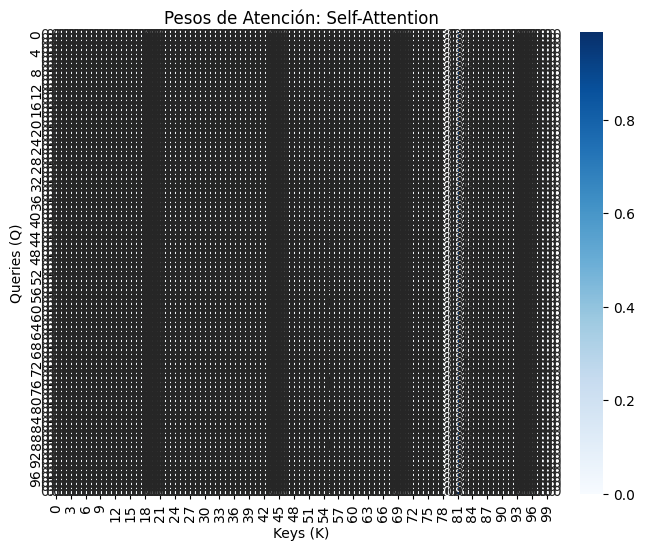

In [18]:
visualize_attention(self_attention_weights, "Pesos de Atención: Self-Attention")

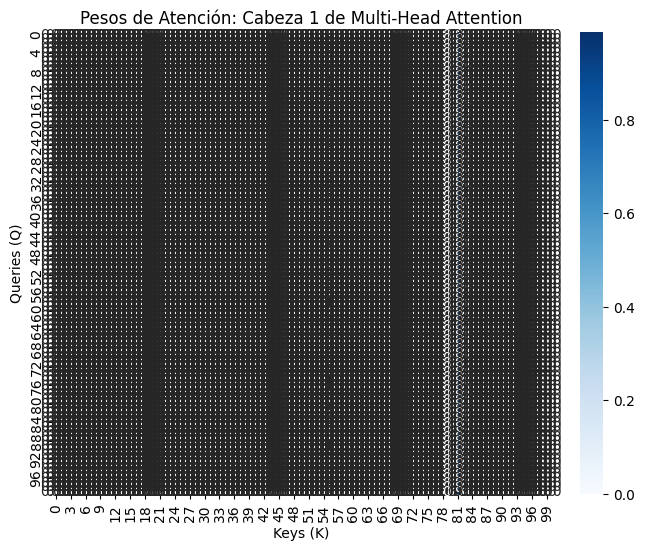

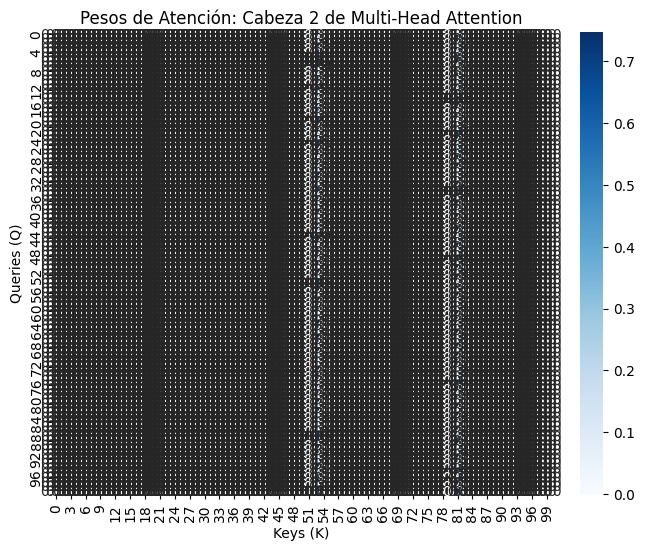

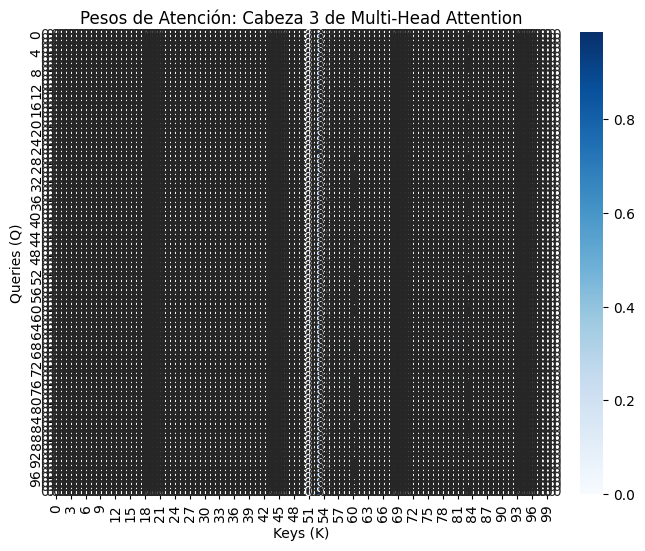

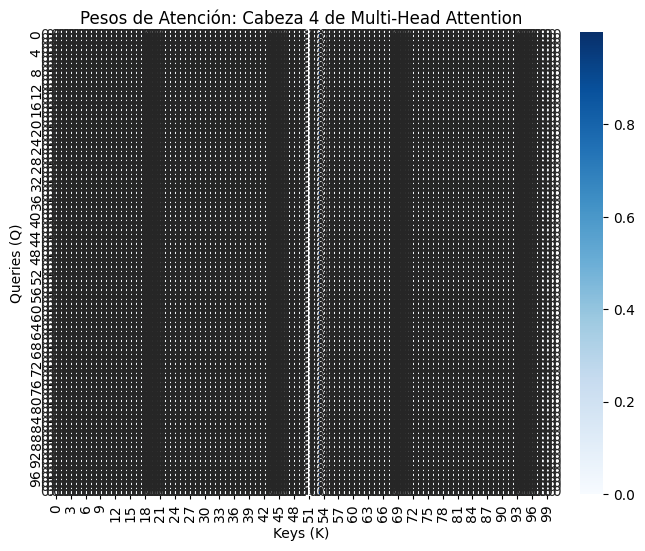

In [19]:
for i, weights in enumerate(multi_head_attention_weights):
    visualize_attention(weights, f"Pesos de Atención: Cabeza {i + 1} de Multi-Head Attention")

In [20]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from mpl_toolkits.mplot3d import Axes3D

# Reducción de dimensionalidad y representación en 3D
def visualize_vectors_3d(X, title, labels=None):
    """
    Visualiza los vectores en 3D aplicando PCA para reducir la dimensionalidad.

    Args:
        X (array-like): Matriz de datos de alta dimensionalidad.
        title (str): Título del gráfico.
        labels (list, optional): Etiquetas para cada punto (opcional).

    Returns:
        None
    """
    # Aplicar PCA para reducir a 3 dimensiones
    pca = PCA(n_components=3)
    reduced_vectors = pca.fit_transform(X)
    
    # Crear el gráfico 3D
    fig = plt.figure(figsize=(12, 10))
    ax = fig.add_subplot(111, projection='3d')
    
    # Dibujar los puntos
    scatter = ax.scatter(
        reduced_vectors[:, 0], 
        reduced_vectors[:, 1], 
        reduced_vectors[:, 2], 
        c='blue', edgecolor='k'
    )

    # Añadir etiquetas si están disponibles
    if labels is not None and len(labels) == len(reduced_vectors):
        for i, label in enumerate(labels):
            ax.text(reduced_vectors[i, 0], 
                    reduced_vectors[i, 1], 
                    reduced_vectors[i, 2], 
                    label, fontsize=8)
    
    # Personalización del gráfico
    ax.set_title(title)
    ax.set_xlabel("Componente Principal 1")
    ax.set_ylabel("Componente Principal 2")
    ax.set_zlabel("Componente Principal 3")
    plt.show()


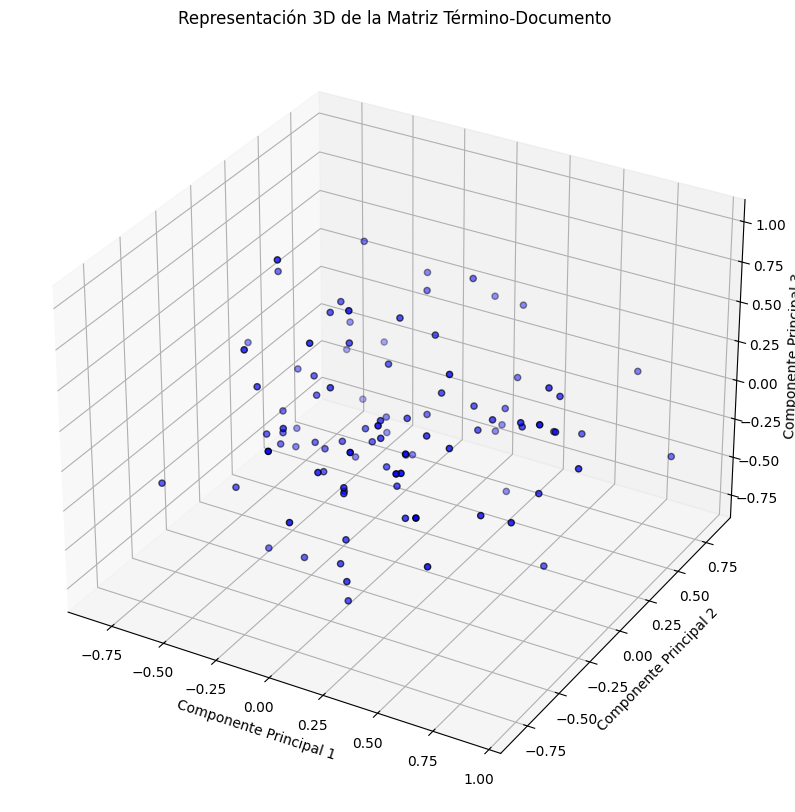

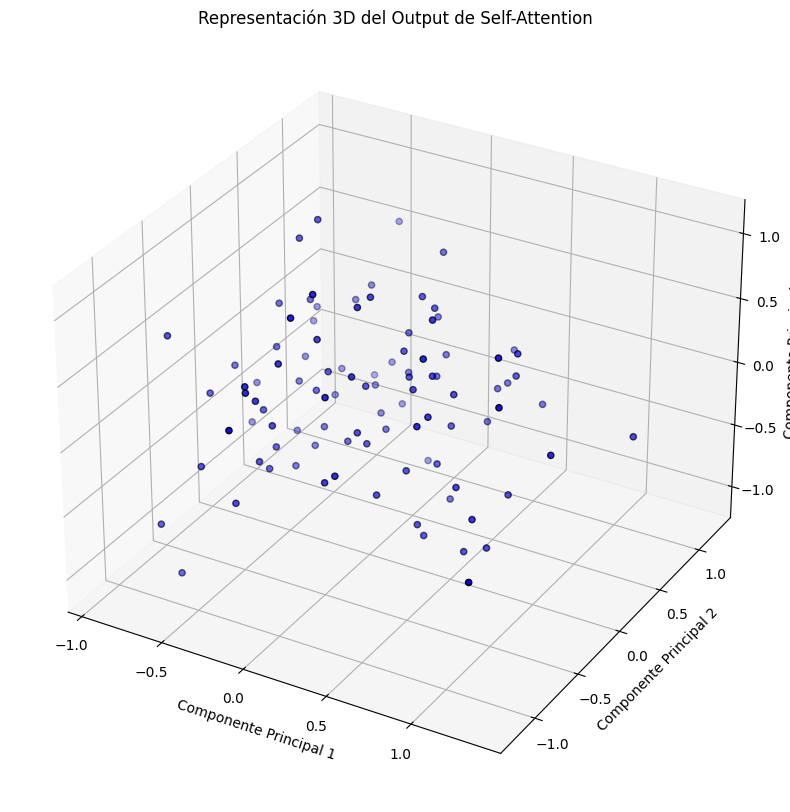

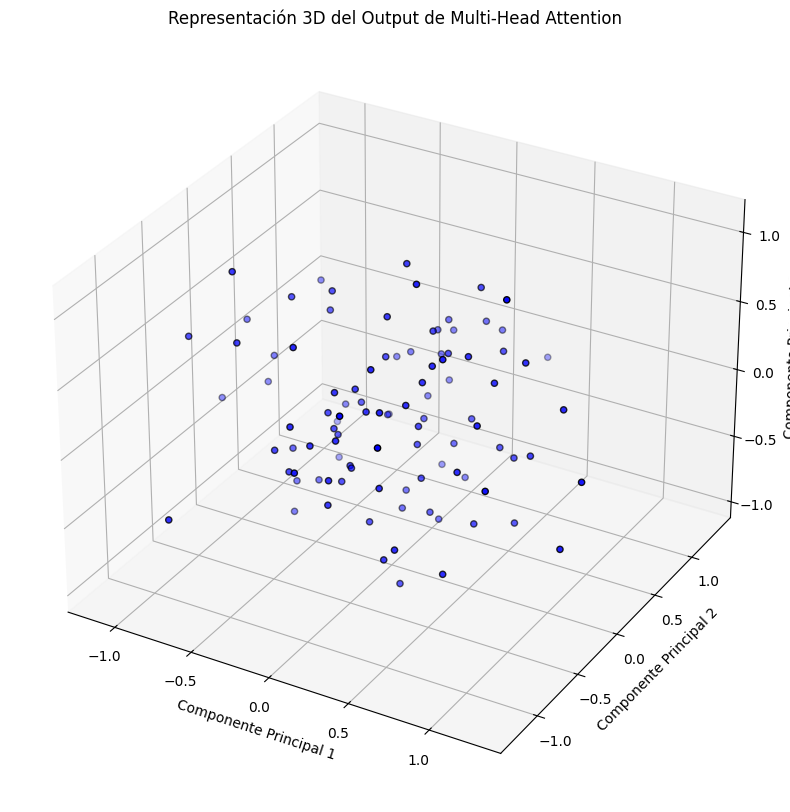

In [21]:
import numpy as np

# Simular datos
np.random.seed(42)
X = np.random.rand(100, 20)  # Matriz término-documento
self_attention_output = np.random.rand(100, 64)  # Output de Self-Attention
multi_head_output = np.random.rand(100, 64)  # Output de Multi-Head Attention

# Visualización de los vectores en 3D
visualize_vectors_3d(X, "Representación 3D de la Matriz Término-Documento")
visualize_vectors_3d(self_attention_output, "Representación 3D del Output de Self-Attention")
visualize_vectors_3d(multi_head_output, "Representación 3D del Output de Multi-Head Attention")

In [22]:
def visualize_vectors_3d(X, title, labels=None):
    """
    Visualiza los vectores en 3D aplicando PCA para reducir la dimensionalidad.

    Args:
        X (array-like): Matriz de datos de alta dimensionalidad.
        title (str): Título del gráfico.
        labels (list, optional): Etiquetas para cada punto (opcional).

    Returns:
        None
    """
    pca = PCA(n_components=3)
    reduced_vectors = pca.fit_transform(X)
    
    fig = plt.figure(figsize=(12, 10))
    ax = fig.add_subplot(111, projection='3d')
    ax.scatter(reduced_vectors[:, 0], reduced_vectors[:, 1], reduced_vectors[:, 2], c='blue', edgecolor='k')

    if labels is not None and len(labels) == len(reduced_vectors):
        for i, label in enumerate(labels):
            ax.text(reduced_vectors[i, 0], reduced_vectors[i, 1], reduced_vectors[i, 2], label, fontsize=8)
    
    ax.set_title(title)
    ax.set_xlabel("Componente Principal 1")
    ax.set_ylabel("Componente Principal 2")
    ax.set_zlabel("Componente Principal 3")
    plt.show()

In [23]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from mpl_toolkits.mplot3d import Axes3D

# Reducción de dimensionalidad y representación en 3D
def visualize_vectors_3d(X, title, labels=None):
    """
    Visualiza los vectores en 3D aplicando PCA para reducir la dimensionalidad.

    Args:
        X (array-like): Matriz de datos de alta dimensionalidad.
        title (str): Título del gráfico.
        labels (list, optional): Etiquetas para cada punto (opcional).

    Returns:
        None
    """
    # Aplicar PCA para reducir a 3 dimensiones
    pca = PCA(n_components=3)
    reduced_vectors = pca.fit_transform(X)
    
    # Crear el gráfico 3D
    fig = plt.figure(figsize=(12, 10))
    ax = fig.add_subplot(111, projection='3d')
    
    # Dibujar los puntos
    scatter = ax.scatter(
        reduced_vectors[:, 0], 
        reduced_vectors[:, 1], 
        reduced_vectors[:, 2], 
        c='blue', edgecolor='k'
    )

    # Añadir etiquetas si están disponibles
    if labels is not None and len(labels) == len(reduced_vectors):
        for i, label in enumerate(labels):
            ax.text(reduced_vectors[i, 0], 
                    reduced_vectors[i, 1], 
                    reduced_vectors[i, 2], 
                    label, fontsize=8)
    
    # Personalización del gráfico
    ax.set_title(title)
    ax.set_xlabel("Componente Principal 1")
    ax.set_ylabel("Componente Principal 2")
    ax.set_zlabel("Componente Principal 3")
    plt.show()


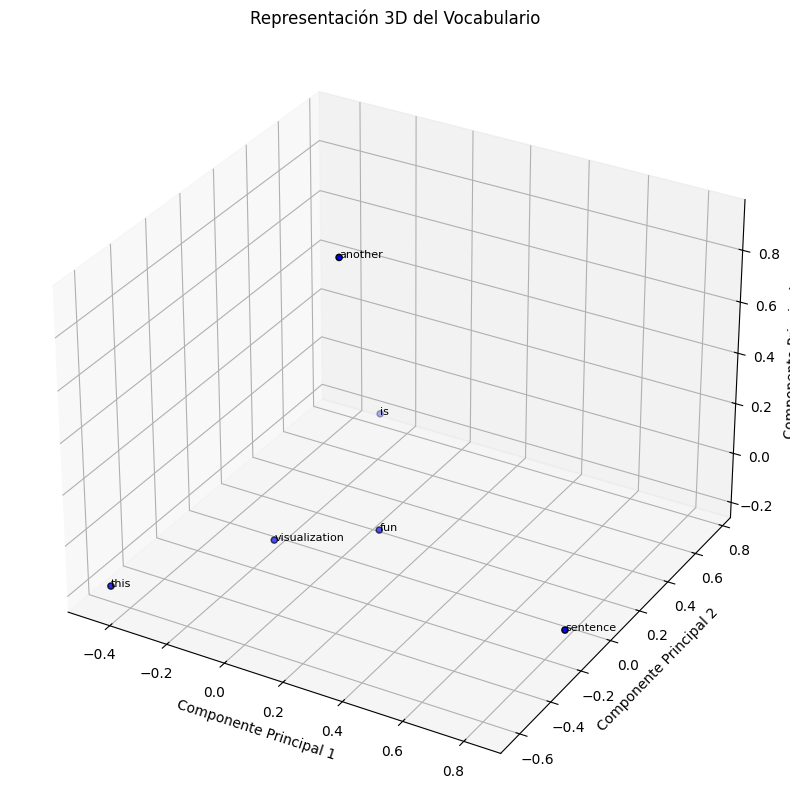

In [24]:
from sklearn.feature_extraction.text import CountVectorizer
import numpy as np

# Ejemplo de vocabulario
corpus = ["This is a sentence", "This is another sentence", "Visualization is fun"]
vectorizer = CountVectorizer()
vectorizer.fit(corpus)

# Obtener etiquetas y la matriz del vocabulario
vocab_labels = vectorizer.get_feature_names_out()
vocab_matrix = np.eye(len(vocab_labels))  # Matriz identidad (cada término representado en un eje)

# Visualizar en 3D
visualize_vectors_3d(vocab_matrix, "Representación 3D del Vocabulario", labels=vocab_labels)
